
# Problem Statement
AI-Driven Media Investment Plan Across Channels for E-commerce



## Introduction
Our task is to re-allocate the budget across
various paid media channels to optimize customer acquisition and conversion rates. By
analyzing the performance of each channel throughout different phases of the customer
journey, we will use machine learning to identify trends and patterns. Based on this analysis,
we will allocate the budget to various paid media channels to maximize conversion.


## Constraints 

•	Total Allocated budget: $200,000

•	All paid media channels should have at least 10% of the total allocated budget


### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the datasets

In [2]:
google_ads = pd.read_csv('Netelixir AIgnition Dataset 1/googleads-performance.csv')
meta_ads = pd.read_csv('Netelixir AIgnition Dataset 1/metaads-performance.csv')
microsoft_ads = pd.read_csv('Netelixir AIgnition Dataset 1/microsoftads-performance.csv')
landing_page = pd.read_csv('Netelixir AIgnition Dataset 1/website-landings.csv')

In [3]:
print("Google Ads Dataset:")
print(google_ads.head())
print("\nMeta Ads Dataset:")
print(meta_ads.head())
print("\nMicrosoft Ads Dataset:")
print(microsoft_ads.head())
print("\nLanding Page Dataset:")
print(landing_page.head())

Google Ads Dataset:
         Date    Campaign type  Impressions  Clicks    Cost  Conversions   
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5  \
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  

Meta Ads Dataset:
         Date  Impressions    Reach   Cost  Clicks  Conversions  Revenue
0  2024-01-01      36034.0  27263.0  209.1   608.0          4.0    158.2
1  2024-01-02      30804.0  22648.0  204.9   516.0         11.0   1412.8
2  2024-01-03      26372.0  18947.0  198.7   429.0          4.0    371.5
3  2024-01-04      17354.0  11436.0  131.2   324.0          4.0      0.0
4  2024-01-05      12036.0   7921.0  114.0   224.0          2

In [4]:
print("\nMissing Values:")
print(google_ads.isnull().sum())
print(meta_ads.isnull().sum())
print(microsoft_ads.isnull().sum())
print(landing_page.isnull().sum())


Missing Values:
Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64
Date           0
Impressions    0
Reach          0
Cost           0
Clicks         0
Conversions    0
Revenue        0
dtype: int64
Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64
User Id                      0
Website Landing Time         0
Is Converted                 0
Source                  614849
Channel                      0
Campaign Type           945585
dtype: int64


## Feature Engineering

In [5]:
def add_features(df):
    df['CPC'] = df['Cost'] / df['Clicks']
    df['CTR'] = df['Clicks'] / df['Impressions']
    df['Conversion Rate'] = df['Conversions'] / df['Clicks']
    df['ROAS'] = df['Revenue'] / df['Cost']
    return df

In [6]:
# Display updated datasets
google_ads = add_features(google_ads)
meta_ads = add_features(meta_ads)
microsoft_ads = add_features(microsoft_ads)

print("\nGoogle Ads with Features:")
print(google_ads.head())
print("\nMeta Ads with Features:")
print(meta_ads.head())
print("\nMicrosoft Ads with Features:")
print(microsoft_ads.head())


Google Ads with Features:
         Date    Campaign type  Impressions  Clicks    Cost  Conversions   
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5  \
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue        CPC       CTR  Conversion Rate      ROAS  
0   1410.3   0.732478  0.006237         0.007254  2.148865  
1      0.0        NaN  0.000000              NaN       NaN  
2    576.4   1.978088  0.067820         0.017928  1.160926  
3      0.0  14.400000  0.000221         0.000000  0.000000  
4   3565.7   1.301195  0.006387         0.007509  2.338164  

Meta Ads with Features:
         Date  Impressions    Reach   Cost  Clicks  Conversions  Revenue   
0  2024-01-01      36034.0  27263.0  209.1   608.

In [7]:
print("\nSummary Statistics for Google Ads:")
print(google_ads.describe())
print("\nSummary Statistics for Meta Ads:")
print(meta_ads.describe())
print("\nSummary Statistics for Microsoft Ads:")
print(microsoft_ads.describe())


Summary Statistics for Google Ads:
         Impressions       Clicks         Cost  Conversions       Revenue   
count     714.000000   714.000000   714.000000   714.000000    714.000000  \
mean   103249.289916   668.372549  1194.405182    19.543697   4380.389916   
std    169925.328248   925.830005  1457.968112    23.106973   5466.346579   
min         1.000000     0.000000     0.000000     0.000000      0.000000   
25%      3614.500000     0.000000    54.600000     0.000000      0.000000   
50%     14576.500000   225.500000   414.850000     6.500000   1126.150000   
75%    101861.000000   870.750000  2127.500000    38.975000   8763.650000   
max    698237.000000  3690.000000  6218.300000    90.200000  24422.700000   

              CPC         CTR  Conversion Rate        ROAS  
count  641.000000  714.000000       535.000000  641.000000  
mean          inf    0.017767              inf    2.418299  
std           NaN    0.027883              NaN    2.776826  
min      0.200000    0.000

## Cleaning the Data 

###  Convert date columns to datetime :

In [8]:
google_ads['Date'] = pd.to_datetime(google_ads['Date'], errors='coerce')
meta_ads['Date'] = pd.to_datetime(meta_ads['Date'], errors='coerce')
microsoft_ads['Date'] = pd.to_datetime(microsoft_ads['Date'], errors='coerce')

# Select only numeric columns for correlation calculation
google_numeric = google_ads.select_dtypes(include=[np.number])
meta_numeric = meta_ads.select_dtypes(include=[np.number])
microsoft_numeric = microsoft_ads.select_dtypes(include=[np.number])

In [9]:
# Calculate correlations using only numeric columns
google_corr = google_numeric.corr()
meta_corr = meta_numeric.corr()
microsoft_corr = microsoft_numeric.corr()

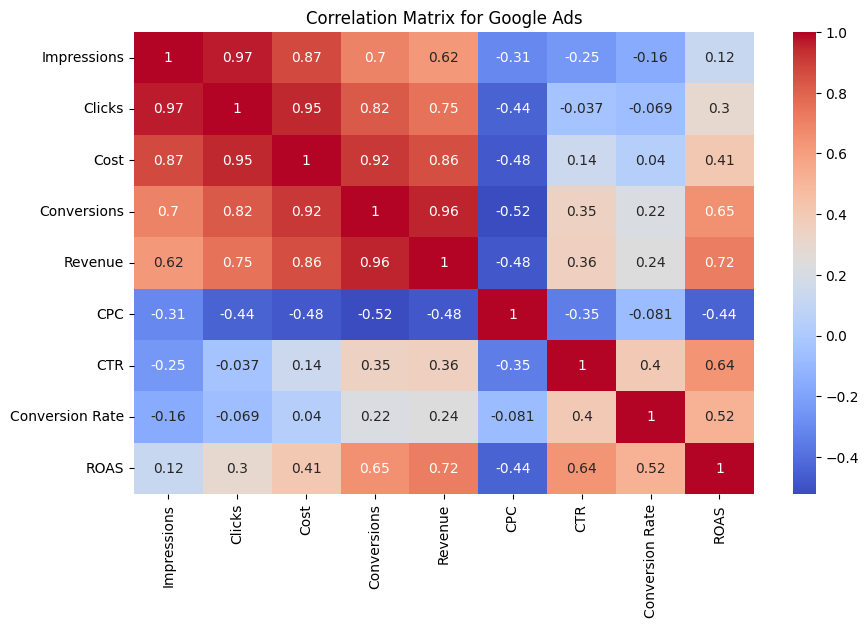

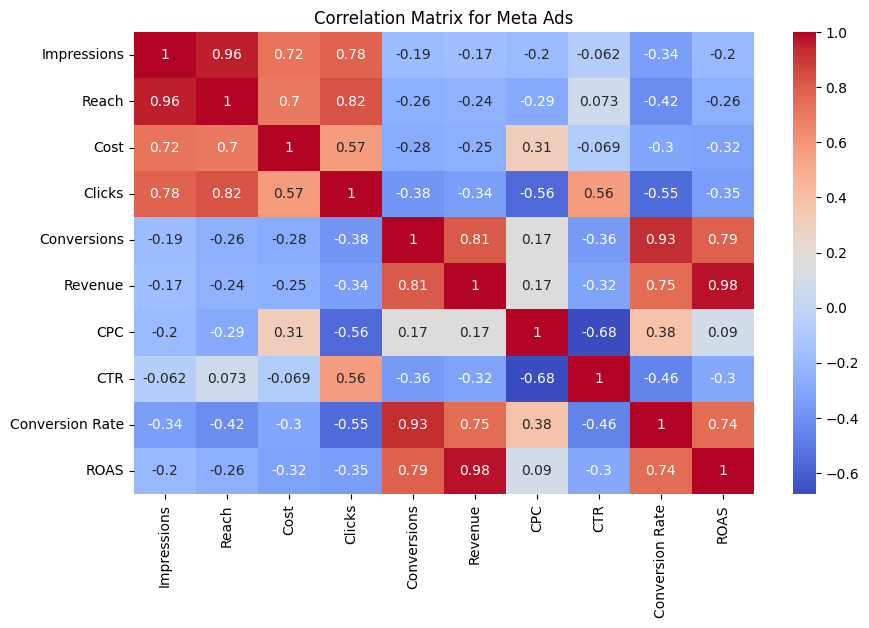

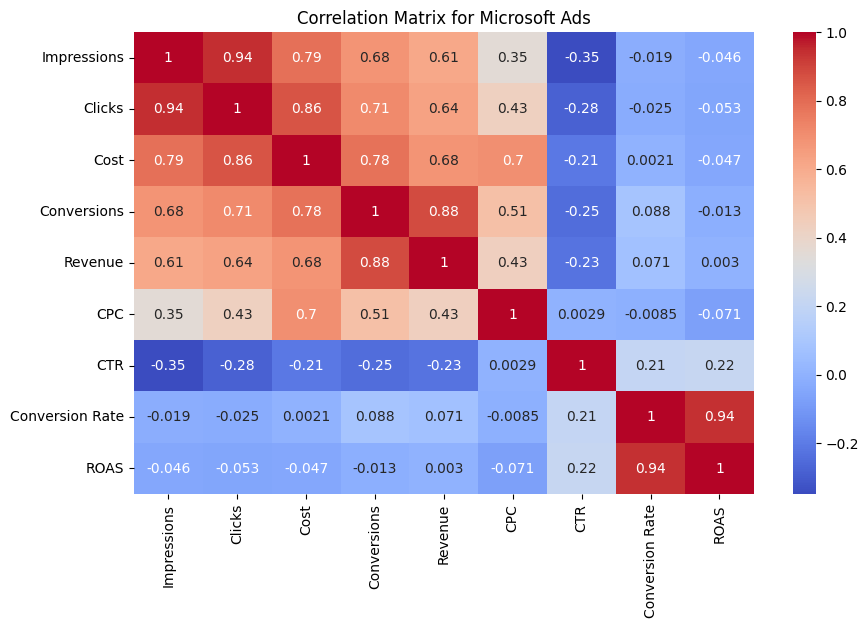

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(google_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Google Ads')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(meta_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Meta Ads')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(microsoft_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Microsoft Ads')
plt.show()

### Libraries for Model Training

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
features = ['Impressions', 'Clicks', 'Cost', 'CPC', 'CTR']
target = 'Conversion Rate'

In [13]:
X_google = google_ads[features]
y_google = google_ads[target]

X_meta = meta_ads[features]
y_meta = meta_ads[target]

X_microsoft = microsoft_ads[features]
y_microsoft = microsoft_ads[target]

## Dropping NaN values

In [14]:
X_google = X_google.dropna()
X_meta = X_meta.dropna()
X_microsoft = X_microsoft.dropna()

y_google = y_google[X_google.index]
y_meta = y_meta[X_meta.index]
y_microsoft = y_microsoft[X_microsoft.index]

### Handeling Large values

In [15]:
def handle_infinite_values(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df
def cap_large_values(df):
    max_float32 = np.finfo(np.float32).max
    df[df > max_float32] = max_float32
    df[df < -max_float32] = -max_float32
    return df

In [16]:
X_google = handle_infinite_values(X_google)
X_meta = handle_infinite_values(X_meta)
X_microsoft = handle_infinite_values(X_microsoft)

X_google = cap_large_values(X_google)
X_meta = cap_large_values(X_meta)
X_microsoft = cap_large_values(X_microsoft)

In [17]:
y_google = y_google.loc[X_google.index]
y_meta = y_meta.loc[X_meta.index]
y_microsoft = y_microsoft.loc[X_microsoft.index]

In [19]:
print("Initial lengths:")
print(f"Google Ads: Features: {len(X_google)}, Target: {len(y_google)}")
print(f"Meta Ads: Features: {len(X_meta)}, Target: {len(y_meta)}")
print(f"Microsoft Ads: Features: {len(X_microsoft)}, Target: {len(y_microsoft)}")

Initial lengths:
Google Ads: Features: 533, Target: 533
Meta Ads: Features: 182, Target: 182
Microsoft Ads: Features: 710, Target: 710


## Cleaning the data

In [20]:
# Function to replace infinite values with NaN and drop them
def handle_infinite_values(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

# Clean the feature sets by replacing infinite values and dropping NaNs
X_google_clean = handle_infinite_values(X_google.copy()).dropna()
X_meta_clean = handle_infinite_values(X_meta.copy()).dropna()
X_microsoft_clean = handle_infinite_values(X_microsoft.copy()).dropna()

# Align the target vectors with the cleaned feature sets
y_google_clean = y_google.loc[X_google_clean.index]
y_meta_clean = y_meta.loc[X_meta_clean.index]
y_microsoft_clean = y_microsoft.loc[X_microsoft_clean.index]

print("Cleaned feature sets and target vectors are aligned:")
print(f"Google Ads: Features: {len(X_google_clean)}, Target: {len(y_google_clean)}")
print(f"Meta Ads: Features: {len(X_meta_clean)}, Target: {len(y_meta_clean)}")
print(f"Microsoft Ads: Features: {len(X_microsoft_clean)}, Target: {len(y_microsoft_clean)}")

Cleaned feature sets and target vectors are aligned:
Google Ads: Features: 533, Target: 533
Meta Ads: Features: 182, Target: 182
Microsoft Ads: Features: 710, Target: 710


## Splitting the data 

In [21]:
# Train-test split with cleaned data
X_train_google, X_test_google, y_train_google, y_test_google = train_test_split(X_google_clean, y_google_clean, test_size=0.2, random_state=42)
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta_clean, y_meta_clean, test_size=0.2, random_state=42)
X_train_microsoft, X_test_microsoft, y_train_microsoft, y_test_microsoft = train_test_split(X_microsoft_clean, y_microsoft_clean, test_size=0.2, random_state=42)

# Initialize and train models
model_google = RandomForestRegressor(random_state=42)

## Training the Model

In [22]:
# Initialize and train models
model_google = RandomForestRegressor(random_state=42)
model_google.fit(X_train_google, y_train_google)

model_meta = RandomForestRegressor(random_state=42)
model_meta.fit(X_train_meta, y_train_meta)

model_microsoft = RandomForestRegressor(random_state=42)
model_microsoft.fit(X_train_microsoft, y_train_microsoft)

RandomForestRegressor(random_state=42)

In [23]:
# Make predictions using the trained models
predicted_roas_google = model_google.predict(X_google_clean)
predicted_roas_meta = model_meta.predict(X_meta_clean)
predicted_roas_microsoft = model_microsoft.predict(X_microsoft_clean)

print("Predictions generated:")
print(f"Google Ads predictions length: {len(predicted_roas_google)}")
print(f"Meta Ads predictions length: {len(predicted_roas_meta)}")
print(f"Microsoft Ads predictions length: {len(predicted_roas_microsoft)}")

Predictions generated:
Google Ads predictions length: 533
Meta Ads predictions length: 182
Microsoft Ads predictions length: 710


In [24]:
# Initialize the columns in original DataFrames with NaN
google_ads['Predicted ROAS'] = np.nan
meta_ads['Predicted ROAS'] = np.nan
microsoft_ads['Predicted ROAS'] = np.nan

# Assign predictions to the correct indices in the original DataFrames
google_ads.loc[X_google_clean.index, 'Predicted ROAS'] = predicted_roas_google
meta_ads.loc[X_meta_clean.index, 'Predicted ROAS'] = predicted_roas_meta
microsoft_ads.loc[X_microsoft_clean.index, 'Predicted ROAS'] = predicted_roas_microsoft

# Display the updated DataFrames
print("Predictions added to Google Ads DataFrame:")
print(google_ads.head())

print("Predictions added to Meta Ads DataFrame:")
print(meta_ads.head())

print("Predictions added to Microsoft Ads DataFrame:")
print(microsoft_ads.head())


Predictions added to Google Ads DataFrame:
        Date    Campaign type  Impressions  Clicks    Cost  Conversions   
0 2024-01-01    Cross-network     143669.0   896.0   656.3          6.5  \
1 2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2 2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3 2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4 2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue        CPC       CTR  Conversion Rate      ROAS  Predicted ROAS  
0   1410.3   0.732478  0.006237         0.007254  2.148865        0.024902  
1      0.0        NaN  0.000000              NaN       NaN             NaN  
2    576.4   1.978088  0.067820         0.017928  1.160926        0.023552  
3      0.0  14.400000  0.000221         0.000000  0.000000        0.004278  
4   3565.7   1.301195  0.006387         0.007509  2.338164        0.013751  
Predictions added to Meta Ads DataFrame:
   

## Allocating the budget

In [25]:
def allocate_budget(total_budget, google_roas, meta_roas, microsoft_roas):
    total_roas = google_roas + meta_roas + microsoft_roas
    google_budget = (google_roas / total_roas) * total_budget
    meta_budget = (meta_roas / total_roas) * total_budget
    microsoft_budget = (microsoft_roas / total_roas) * total_budget
    return google_budget, meta_budget, microsoft_budget


In [26]:
total_budget = 200000
average_google_roas = google_ads['Predicted ROAS'].mean()
average_meta_roas = meta_ads['Predicted ROAS'].mean()
average_microsoft_roas = microsoft_ads['Predicted ROAS'].mean()

google_budget, meta_budget, microsoft_budget = allocate_budget(
    total_budget, average_google_roas, average_meta_roas, average_microsoft_roas
)

print(f"\nOptimized Budget Allocation:")
print(f"Google Ads: ${google_budget:.2f}")
print(f"Meta Ads: ${meta_budget:.2f}")
print(f"Microsoft Ads: ${microsoft_budget:.2f}")


Optimized Budget Allocation:
Google Ads: $51108.08
Meta Ads: $115414.34
Microsoft Ads: $33477.57


##  Visualization of budget allocation

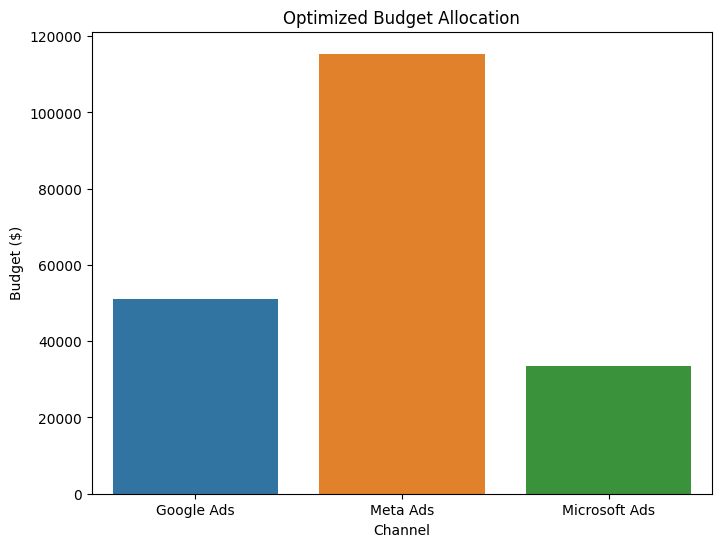

In [27]:
allocation = {'Channel': ['Google Ads', 'Meta Ads', 'Microsoft Ads'],
              'Budget': [google_budget, meta_budget, microsoft_budget]}

allocation_df = pd.DataFrame(allocation)

plt.figure(figsize=(8, 6))
sns.barplot(x='Channel', y='Budget', data=allocation_df)
plt.title('Optimized Budget Allocation')
plt.xlabel('Channel')
plt.ylabel('Budget ($)')
plt.show()

# Conclusion
In the ever-evolving landscape of digital marketing, e-commerce businesses must continually
optimize their media investments to stay competitive. Understanding how different ad channels
perform at various stages of the customer journey is crucial for effective budget allocation. An
AI-driven solution can provide deeper insights into customer behavior, allowing businesses to
make data-driven decisions that enhance customer acquisition and increase conversion rates.
This, in turn, will lead to improved ROI on marketing spend and higher revenue.